# Hands-on 10: Modulação Digital em Canal com Desvanecimento (caracterização, modelagem e desempenho)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Entender a caracterização e modelagem de um canal com desvanecimento plano;
- Entender como gerar um canal com desvanecimento plano;
- Entender como fazer análise de desempenho de um enlace de comunicação digital sujeito a canais com ruído AWGN e desvanecimento plano (traçar e analisar curva BER vs $E_B/N_0$ via simulação de Monte Carlo).

# Manifestações do canal de comunicação

Um sinal ao passar pelo canal de comunicação está sujeito as manifestações do meio físico que atravessa. Para uma canal sem fio de RF, essas manisfestações são classificadas em dois grandes grupos: (i) desvanecimento de larga escala; e (ii) desvanecimento de pequena escala. Não esquecendo que além dessas manifestações, o ruído está sempre presente. A figura a seguir traz uma taxonomia e uma classificação das manisfetações clássicas de um canal sem fio RF.

![fig_manisf_canal](./FIGS/HD_10/manisf_canal.png)


O desvanecimento, ao contrario do ruído que é aditivo, são outras formas de atenuação do sinal caracterizadas como distúrbios multiplicativos. 

## Desvanecimento e larga escala (large scale fading)

São atenuações causadas pela interação da onda eletromagnética com o ar, que sofre reflexão, difração e refração. Ela é dita de larga escala porque uma variação significativa no sinal recebido só é percebida para deslocamentos da ordem de 10-1000 vezes o comprimento da onda transmitida.  Essa atenução também exibe uma forte dependência da distribuição de objetos grandes (comparados ao comprimentos de onda) entre transmissor e receoptor.

Quanto a modelagem, as manifestações de larga escala são classificadas em:

- **Path loss (perda de percurso):**  Atenuação média (medida em alguns comprimentos de onda) que o sinal sofre entre transmissor e receptor. Essa atenuação depedende principalmente da frequência da onda, da distância entre transmissor e receptor, da topografia do ambiente de propagação, e da altura das antenas do Tx e do Rx.

- **Shadowing (sombreamento):** Atenuação causada principalmente por reflexão e difração do sinal em grandes obstáculos. Como geralmente é difícil prevê quantos, e em qual configuração, estão os vários obstáculos entre Tx e Rx, esse fenômeno é modelado estatisticamente.  

## Desvanecimento de pequena escala (small scale fading)

Os fenômenos físicos associados ao desvanecimento de pequena escala são: 

- **Multipercursos**: o sinal no receptor é composto por vários sinais oriundos de diferentes caminhos entre o transmissor e o receptor. Cada réplica do sinal tem sua amplitude, seu retardo temporal e seu ângulo de chegada e quando se somam vetorialmente no receptor causam pontos de sinal forte e de sinais fracos. O principal efeito é o **espalhamento temporal do sinal (delay spread)**, como ilustrado na figura a seguir. 

![fig_multipath](./FIGS/HD_10/multipath.png)

- **Doppler:** Causado pela mobilidade realtiva entre Tx e Rx.  O principal efeito é o **espalhamento em frequência do sinal (doppler spread)**, como ilustrado na figura a seguir.

![fig_doppler](./FIGS/HD_10/doppler.gif)
![fig_doppler2](./FIGS/HD_10/doppler2.png)

Assim, o desvanecimento de pequena escala está associado a uma atenuação que pode se manisfetar no tempo e/ou frequência, podendo ter uma variação significativa ou não, quando uma **janela de interesse** é considerada. Dai surge o conceito de **seletividade** e **coerência**:

- Se um canal é **coerente**, ele não muda em função do tempo ou frequência dentro de uma **janela de interesse**;
- O oposto a coerência é **seletividade**. Um canal é dito **seletivo** se varia em função do tempo ou frequência  dentro de uma **janela de interesse**;

Algo muito importante considerando desvanecimento de pequena escala é descrever um canal sem fio afetado por algum tipo de seletividade. Sobre isso, podemos escrever:

- **Efeitos dos multipercursos**: Espalhamento temporal do sinal e, como consequência, uma distorção em frequência (alterações das componentes do espectro do sinal transmitido), como ilustra a figura a seguir. Se dentro da banda de interesse (**janela de interesse em frequência**) o desvanecimento varia, o canal é dito **com desvanecimento seletivo em frequência**. Os principais efeitos negativos são: ISI, mutilação do pulso, piso de BER (mesmo aumentando a SNR a BER continua a mesma). Caso contrário, o canal é dito **com desvanecimento plano em frequência**, causando perda de SNR.

![fig_efeitos_multipath](./FIGS/HD_10/efeitos_multipath.png)


- **Efeitos do Doppler**: Espalhamento em frequência do sinal e, como consequência, uma atenuação no tempo (variações de amplitude do sinal transmitido), como ilustra a figura a seguir. Se dentro de um tempo de interesse (**janela temporal de interesse**) o desvanecimento varia, o canal é dito **com desvanecimento rápido**. Os principais efeitos negativos são: distorção forma do pulso; piso de BER; problemas de sincronização de fase nos receptores.  Caso contrário, o canal é dito **com desvanecimento lento**, causando perda de SNR.

![fig_efeitos_doppler](./FIGS/HD_10/efeitos_doppler.png)


Ao combinar o efeito doppler com os efeitos de multipercursos, o sinal sofrerá espalhamento em frequência (doppler) e espalhamento temporal (multipercursos), como ilustra a figura a seguir.

![fig_doppler_multipath](./FIGS/HD_10/doppler_multipath.png)


### Canal completo

Ao considerarmos os desvanecimentos de larga e pequena escalas, o sinal recebido é composto de três partes: (i) perda de percurso; (ii) Sombreamento; e (iii) desvanecimento de pequena escala. Esses efeitos se somam em dB (se multiplicam em escala linear), como ilustra a figura a seguir.


![fig_Manifestacoes_canal](./FIGS/HD_10/Manifestacoes_canal1.png)
![fig_Manifestacoes_canal](./FIGS/HD_10/Manifestacoes_canal.png)


Nesse Hands-On Será abordado apenas desvanescimento de baixa escala.


# Caracterização dos desvanecimentos para análise de desempenho de modulação digital

Como exposto em [Hands-on 09: Modulação Digital (modulação, demodulação e desempenho em ruído AWGN) - Parte 01
](http://nbviewer.jupyter.org/github/vicentesousa/DCO2004_LabPSC/blob/master/h09_1.ipynb), uma maneira muito tradicional (e funcional) de mostrar o desempenho de um enlace de comunicação é por meio das curvas $P_e$ teórica vs $E_b/N_0$ e BER simulada vs $E_b/N_0$, geralmente com $Pe$ e BER em escala logarítmica e $E_b/N_0$ em dB. Ela serve para comparar o desempenho de diferentes modulações bem como a análise de valor agregado de codificadores de canal e estratégias de multiplexação, por exemplo. 

Como a variação de SNR é feita como um parâmetro de entrada, não faz muito sentido analisar casos que o ponto de Tx e o de Rx estejam dispostos em diferentes posições. Assim, em tais análises, o desvanecimento de larga escala geralmente não é modelado. Contudo, é importante modelar a variação rápida temporal e/ou seletiva em frequência do sinal, pois são manifestações que ocorrem com menor granularidade (temporal ou em frequência) e tem grande impacto no desempenho de um enlace. Essa caracterização é um dos objetos desse hands-on.

Os efeitos de pequena escala podem ser escritos como um filtro linear que modela $n$ multipercursos cada qual possuindo um determinado atraso $\tau$ e amplitudes $\alpha$. A resposta ao impulso $h(t)$ do canal pode ser escrita como:

$$ h(t)= \sum_{n} \alpha _{n}(t) e^\left [ 2 \pi fc \tau _{n}(t)\right] \delta (t - \tau _{n}(t)) $$

O termo $\alpha _{n}(t)$ representa a atenuação de cada réplica do sinal, enquanto que $e^\left [ 2 \pi fc \tau _{n}(t)\right]$ representa o atraso de propagação e outros desvios de fase (e.g. doppler).

Analisando a transmissão de uma portadora senoidal não modulada $s(t)= A \cdot cos(2 \pi f_{c} t)$, o sinal recebido na presença do ruído n(t) pode ser expresso da seguinte forma:

$$ r(t)= A \sum_{n} \alpha _{n}(t) \cdot cos[2 \pi f_{c} (t - \tau _{n}(t))] + n(t) =  A \cdot Re  \left [  \sum_{n} \alpha _{n}(t) e^{-j 2 \pi f_{c} \tau _{n}(t)} \cdot e^{j 2 \pi f_{c} t}  \right ] + n(t)$$


Escrevendo $c(t) = \sum_{n} \alpha _{n}(t) \cdot e^{-j 2 \pi f_{c} \tau _{n}(t)} $, o sistema pode ser modelado como na figura a seguir.

![Figura01](./FIGS/HD_10/desvanecimento_plano.png)


Logo, o sinal $c(t)$ pode ser escrito como:
$$c(t) = \sum_{n} \alpha _{n}(t) \cdot e^{-j 2 \pi f_{c} \tau _{n}(t)} = \sum_{n} \alpha _{n}(t) \cdot e^{-j \phi _{n}(t)}$$

Ele representa a resposta do canal como um somatório de exponenciais complexas. Podemos verificar que apesar da entrada do sinal ser de uma frequencia só (sinal portadora), a saída do canal é um sinal que contém múltiplas componentes de frequência, as quais foram geradas pelo resultado das variações do tempo na resposta do canal. Isso é mais uma evidência que o canal pode ser modelado por um filtro. 

O valor complexo do ganho do canal pode ser expressado da seguinte forma:

$$  c(t)= c_{R}(t)+jc_{I}(t) =\alpha(t) \cdot e^{j\phi(t)},$$

sendo:

$$\alpha(t)=\sqrt{c_{R}^{2}(t)+c_{I}^{2}(t)} $$
$$ \phi(t)=arctan \left ( \frac{c_{I}}{c_{R}} \right ) $$

Quando $c(t)$ consiste de uma série de componentes de multipercurso com amplitudes aleatórias e fases uniformemente distribuídas, as componentes $c_{r}(t)$ e  $c_{i}(t)$ são modelados geralmente por variáveis aleatórias com distribuição normal (teorema central do limite). Como consequência, $\alpha (t)$ é caracterizado estatisticamente como uma variável aleatória com distribuição de probabilidade do tipo Rayleigh, enquanto que $\phi (t)$ é uniformemente distribuida num intervalo de $(0,2\pi)$. Assim, o canal é chamado de **Rayleigh Fading channel**. A PDF do desvanecimento de Rayleigh é descrita pela seguinte equação:

$$f(\alpha)=\frac {\alpha^{2}}{\sigma^{2}} \cdot  e^{\frac{-\alpha^{2}}{\sigma^{2}}}, \; \alpha \geq 0 $$

Sendo $f(\alpha)=0$ para $\alpha < 0 $. O parâmetro $\sigma^{2}=E[c_{r}^{2}]=E[c_{i}^{2}]$.


A CDF da distribuição rayleigh é dada pela seguinte equação:
$$f(x)=1-e^{\frac{-x^{2}}{2\sigma^{2}}} = u, \; {\rm com} \;  0\leq u\leq1 $$

Aplicando $ln()$ nos dois lados:
$$ ln(1-u)=ln(e^{\frac{-x^{2}}{2\sigma^{2}}}) \Rightarrow  \frac{-x^{2}}{2\sigma^{2}} = ln(1-u)$$

Agora, isolando $x$:

$$ x^{2}=-2\sigma^{2}ln(1-u) \Rightarrow   x=\sqrt{-2\sigma^{2}ln(1-u)}$$

Como $ 0\leq1-u\leq1$ sendo $u$ uma variável aleatória com distribuição uniforme de 0 a 1, podemos simplesmente substituir por:
$$ x=\sqrt{2\sigma^{2}ln(u)}$$

A formulação acima é o **método da inversão** para gerar variáveis Rayleigh por meio de variáveis uniformemente distribuídas.

Outro aspecto a se destacar em um canal sem fio é a existência ou ausência de uma onda direta entre Tx e Rx. Nesse aspecto, um canal sem fio é classificado como apresentando LOS (Line-of-Sight ou linha de visada) e NLOS (Non-Line-of-Sight ou sem linha de visada).

- NLOS (Non-Line-of-Sight) é caracterizada pela ausência de componentes fortes de sinal entre transmissor e receptor, fazendo com que o sinal recebido seja composto por réplicas do sinal transmitido que sofrem atenuações semelhantes. A figura a seguir ilustra tal situação.
![fig_NLOS](./FIGS/HD_10/NLOS.png)
Nessa situação, não é identificada uma componente principal do sinal cuja intensidade é muito maior que as demais. Assim, o desvanecimento de pequena escala de um canal sem fio, sujeito a esse tipo de situação, pode ser representado por uma variável aleatória complexa  $W = W_{1}+j\cdot W_{2}$, sendo as componentes real e complexas independentes entre si. Pelo teorema central do limite, essas variáveis tem distribuição Gaussiana com média $\mu = 0$ e uma variância de $\sigma^{2}$. Então, como já explicado anteriormente, a função densidade de probabilidade da envoltória do sinal recebido $\alpha(t)$  é Rayleigh. 

- LOS (Line-of-Sight) é caracterizada pela existência de uma onda direta entre a antena transmissora e receptora.  A figura a seguir ilustra tal situação.
![fig_LOS](./FIGS/HD_10/LOS.png)
Nessa situação, existe  uma componente principal do sinal cuja intensidade é muito maior que as demais. Consequentemente, o desvanecimento de pequena escala, sujeito a esse tipo de situação, não será mais do tipo Rayleigh, mas do tipo Rice (Rician).

Assim, o modelo de desvanecimento Rice é utilizado para simular ambientes que produzem componentes de múltiplo percurso em adição a uma componente principal (dominante) em linha de visada, ou LOS (*Line of Sight*). A componente LOS é chamada de especular e as componentes de múltiplo percurso são chamadas de aleatórias ou de espalhamento. Enquanto a distribuição das componentes aleatórias tem média nula, a distribuição da componente especular tem média não-nula. 

Considere as variáveis aleatórias $X$ e $Y$, sendo que $X$ representa a componente LOS, e que $Y$ representa as componentes NLOS. Por definição, $X$ tem média não-nula ($m_{1} = s$), $Y$ tem média nula ($m_{2} = 0$) e ambas têm variância igual a $\sigma^{2}$. Dessa forma, a $Z = \sqrt{X^{2}+Y^{2}}$ é uma distribuição Rice. 

Uma vez que as componentes possuem médias diferentes, definimos um parâmetro de não-centralidade como:
$$ s =  \sqrt{m_{1}^{2}+m_{2}^{2}} = \sqrt{s^{2}+0} $$

O parâmetro de não centralidade é causado pela predominância do percurso dominante (LOS) no ambiente de desvanecimento. Devido a isso, o fator Riciano K determina a razão entre as potências dominantes e remanescentes como:

$$ K = \frac{Potência \enspace LOS}{Potência \enspace NLOS} $$ 

A versão estatística de K representa a potência do envelope desvanecido, que foi produzida pelas médias de $X$ e $Y$:

$$ K = \frac{m_{1}^{2}+m_{2}^{2}}{2\sigma^2} = \frac{s^2}{2\sigma^2}  \enspace (1)$$ 

Um canal com desvanecimento Rice é definido pelos seguintes parâmetros:

1. Fator Riciano $K$;
2. A potência total da componente LOS e NLOS: ($s^2 + 2\sigma^2$).

Podemos definir $s$ e $\sigma$, de modo que satisfaçam a equação (1), como:

$$ s = \frac{K}{K+1}\cdot Potência \enspace Total $$

$$ \sigma = \frac{Potência \enspace Total}{\sqrt{2(K+1)}} $$

# Prática 1: Geração de Desvanecimento Rayleigh

Nessa prática iremos gerar uma sequência de amostras de uma variável aleatória com distribuição de probabilidade Rayleigh, gerar o histograma das amostras e comparar com a formulação teórica da PDF Rayleigh. Vamos ilustrar duas maneiras de gerar amostras com PDF Rayleigh (método da inversão da PDF e por duas Gaussianas).

Uma das prerrogativas do canal com desvanecimento plano (coerente em frequência) é que a envoltória tem PDF Rayleigh e a fase é uniformemente distribuída de 0 a 2$\pi$. Para ilustrar o comportamento da fase, geraremos um canal Rayleigh complexo e mostraremos seu histograma de fase.


**Passo 01:** Abra um script no Python, salve-o como **handson10_1.py** e escreva o seguinte código:

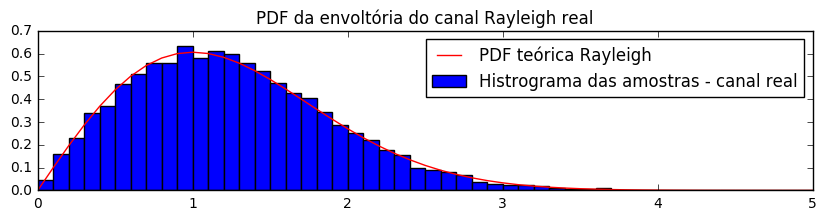

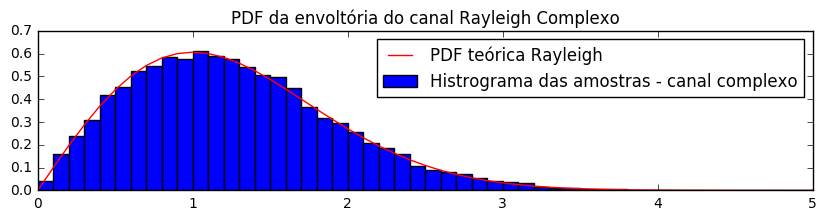

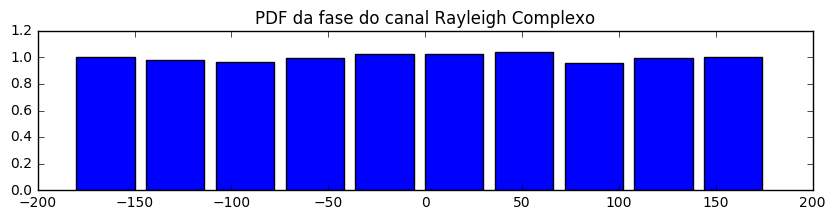

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
#
# Parâmetros
N = 20000                                  # Número de amostras
ts = 0.1
x=np.arange(0,5+ts,ts)                     # Eixo x
sigma = 1                                  # Parâmetro Rayleigh
u = np.random.rand(N)                      # Amostras aleatórias uniformemente distribuídas de 0 a 1
#
# Canal Rayleigh real via método da inversão
rReal = sigma*np.sqrt(-2*np.log(u))        # Rayleigh via método da inversão
#
# PDF Rayleigh teórico 
pdfTeo = x/(sigma**2)*np.exp(-(x/sigma)**2/2) 
# 
# Canal Rayleigh complexo via VAs Gaussianas independentes
rComplexo = np.random.randn(N)+1j*np.random.randn(N)
#
# Gráficos
plt.figure(1,[10,7])
plt.subplot(3,1,1)
# Histograma do Canal real vs PDF teórica
[xh, temp]=np.histogram(rReal,bins=x)
temp = temp[0:len(temp)-1]
width = ts
plt.bar(temp,xh/(np.sum(xh)*ts),width,label='Histrograma das amostras - canal real')
#
# PDF teórica
plt.plot(x,pdfTeo,'r', label='PDF teórica Rayleigh')
#
plt.title('PDF da envoltória do canal Rayleigh real')
plt.legend()
plt.show()
#
# Envoltória do Canal complexo
plt.figure(1,[10,7])
plt.subplot(3,1,2)
# Histograma da envoltória do canal complexo vs PDF teórica
[xh, temp]=np.histogram(np.abs(rComplexo),bins=x)
temp = temp[0:len(temp)-1]
width = ts
plt.bar(temp,xh/(np.sum(xh)*ts),width,label='Histrograma das amostras - canal complexo')
#
# PDF teórica
plt.plot(x,pdfTeo,'r', label='PDF teórica Rayleigh')
#
plt.title('PDF da envoltória do canal Rayleigh Complexo')
plt.legend()
plt.show()
# Histrograma da Fase do Canal complexo
plt.figure(1,[10,7])
plt.subplot(3,1,3)
[xhra, tempra]=np.histogram(np.angle(rComplexo))
tempra = tempra[0:len(tempra)-1]
plt.bar(180/np.pi*tempra,xhra/(np.sum(xhra)*ts),width=30)
plt.title('PDF da fase do canal Rayleigh Complexo')
plt.show()

# Comentários sobre o código

- Começamos o código definindo a quantidade $N$ de amostras a gerar e o passo $ts$ do eixo das abcissas dos gráficos. Esse parâmetro também será usado para definir o tamanho dos bins dos histogramas das amostras. O último parâmetros é o $\sigma$ Rayleigh.

>```python
...
# Parâmetros
N = 20000                                  # Número de amostras
ts = 0.1
x=np.arange(0,5+ts,ts)                     # Eixo x
sigma = 1                                  # Parâmetro Rayleigh
```

- O canal Rayliegh real é gerado pelo método da inversão: geração de amostras uniformes aplicadas e função inversa da CDF Rayleigh.

>```python
...
u = np.random.rand(N)                      # Amostras aleatórias uniformemente distribuídas de 0 a 1
#
# Canal Rayleigh real via método da inversão
rReal = sigma*np.sqrt(-2*np.log(u))        # Rayleigh via método da inversão
```

- A formulação teórica da PDF Rayleigh também é invocada para os valores do eixo das abcissas previamente definido.

>```python
...
ts = 0.1
x=np.arange(0,5+ts,ts)                     # Eixo x
...
# PDF Rayleigh teórico 
pdfTeo = x/(sigma**2)*np.exp(-(x/sigma)**2/2) 
...
```

- Também geramos o canal complexo com o intuito de modelar tanto a informação de envoltória (ao calcularmos o módulo) quanto a informação de ângulo.

>```python
# Canal Rayleigh complexo via VAs Gaussianas independentes
rComplexo = np.random.randn(N)+1j*np.random.randn(N)
```

- A primeira parte dos gráficos compara o histograma do canal real com a PDF teórica Rayleigh. Veja pela figura que existe um completo casamento entre o experimental e o teórico. Note também que, devido a implementação da função **histogram** em Python, o eixo dos bins (abcissas) precisa ser ajustado em uma amostra.

>```python
# Histograma do Canal real vs PDF teórica
[xh, temp]=np.histogram(rReal,bins=x)
temp = temp[0:len(temp)-1]
width = ts
plt.bar(temp,xh/(np.sum(xh)*ts),width,label='Histrograma das amostras - canal real')
#
# PDF teórica
plt.plot(x,pdfTeo,'r', label='PDF teórica Rayleigh')
#
plt.title('PDF da envoltória do canal Rayleigh real')
plt.legend()
plt.show()
```

- A segunda parte dos gráficos compara o histograma do módulo (norma) do canal complexo com a PDF teórica Rayleigh. Veja pela figura que existe um completo casamento entre o experimental e o teórico. 

>```python
# Envoltória do Canal complexo
plt.figure(1,[10,7])
plt.subplot(3,1,2)
# Histrograma da envoltória do canal complexo vs PDF teórica
[xh, temp]=np.histogram(np.abs(rComplexo),bins=x)
temp = temp[0:len(temp)-1]
width = ts
plt.bar(temp,xh/(np.sum(xh)*ts),width,label='Histrograma das amostras - canal complexo')
#
# PDF teórica
plt.plot(x,pdfTeo,'r', label='PDF teórica Rayleigh')
#
plt.title('PDF da envoltória do canal Rayleigh Complexo')
plt.legend()
plt.show()
```

- A última parte do gráfico mostra o histrograma da fase do canal complexo. Podemos comprovar que a fase é uniformemente distribuída de -$\pi$ a $\pi$, como considerado pela modelagem de canal Rayleigh.
>```python
# Histrograma da Fase do Canal complexo
plt.figure(1,[10,7])
plt.subplot(3,1,3)
[xhra, tempra]=np.histogram(np.angle(rComplexo))
tempra = tempra[0:len(tempra)-1]
plt.bar(180/np.pi*tempra,xhra/(np.sum(xhra)*ts),width=30)
plt.title('PDF da fase do canal Rayleigh Complexo')
plt.show()
```

# Prática 2: Geração de Desvanecimento Rice

Nessa prática iremos gerar uma sequência de amostras de uma variável aleatória com distribuição de probabilidade Rice, gerar o histograma das amostras e comparar com a formulação teórica da PDF Rice.

**Uma das prerrogativas do canal com desvanecimento plano (coerente em frequência) é que a envoltória tem PDF Rayleigh e a fase é uniformemente distribuída de 0 a 2$\pi$. Para ilustrar o comportamento da fase, geraremos um canal Rayleigh complexo e mostraremos seu histograma de fase.** (verificar o ângulo e ver se isso se confirma para Rice tb)...


**Passo 01:** Abra um script no Python, salve-o como **handson10_2.py** e escreva o seguinte código:

# Prática 3: Desempenho de modulação digital sujeito a Desvanecimento  Rayleigh

Essa prática se destina a prototipar e analisar o desempenho da modulação digital (BPSK) em canal Rayleigh e sujeito a ruído AWGN. O sinal recebido pode ser representado por:

$$ y = hx + n, $$

sendo  $x$ o sinal transmitido, $n$ o ruído AWGN e $h$ o desvanecimento Rayleigh. Supondo que não houvesse desvanecimento, essa equação seria $y=x+n$. 

A detecção mais apropriada para esse tipo de sinal é a coerente, pois a distribuição uniforme de fase do canal Rayleigh inviabiliza a detecção não-coerente. Mais detalhes em [Varsha Mathuranathan, Digital Modulations using Matlab: Build Simulation Models](http://www.gaussianwaves.com). 

Assim, na detecção coerente, o receptor precisa usar técnicas para estimar a resposta impulsiva do canal, i.e., o receptor deve estimar $h$. Isso é feito na maioria dos sistemas modernos via canais pilotos, que são usados para descobrir $h$ antes da transmissão dos bits úteis. Assim, assumiremos que o receptor conhece perfeitamente o valor de $h$, e os símbolos transmistidos $x$ podem ser recuperados no receptor por meio de equalização:

$$\hat{y} = \frac{y}{h} = \frac{hx+n}{h} = x + z$$

A equalização realiza $\frac{y}{h}$, resultando na recuperação de $x$ mais uma versão escalada do ruído, que continua AWGN.  Assim, o processo de recepção pode ser feito da mesma feita para o canal somente com ruído. Para o canal complexo:

$$r = {\rm real}(\hat{y})$$

** Regra de decisão**:
> Se $r > 0 \Rightarrow  s_{0}(t)$, i.e., sinal recebido é mais correlacionado com $s_{0}(t)$ e se decide pelo bit 0;

> Se $r < 0  \Rightarrow  s_{1}(t)$, i.e., sinal recebido é mais correlacionado com  $s_{1}(t)$  e se decide pelo bit 1.

A probabilidade de erro de bits ($Pe$) para a modulação BPSK em um desvanecimento Rayleigh é dada por:

$$ Pe_{Ray+AWGN} = \frac{1}{2}\left( 1-\sqrt{\frac{E_{b}/N_{0}}{1+E_{b}/N_{0}}}\right)$$

A $Pe$ para o canal somente AWGN é:

$$ Pe_{AWGN} = \frac{1}{2}erfc\left(\sqrt{E_{b}/N_{0}}\right) $$

Sabendo disso, é possível realizar a modelagem do protótipo de simulação de desempenho como mostrado na figura a seguir. Esse protótipo modela a simulação de dois casos: (i) Canal AWGN; e (ii) Canal Rayleigh + AWGN.

![fig_simRay](./FIGS/HD_10/simRay.png)

De posse da sequência de bits transmistidos e de bits detectados, fazemos a contagem dos bits diferentes nos dois vetores, calculando $n_{err}$. Finalmente, a $BER$ é calculada como:

$$BER = \frac{n_{err}}{n_{bits}}.$$

O próximo experimento modela os passos acima.


**Passo 01:** Abra um script no Python, salve-o como **handson10_3.py** e escreva o seguinte código:

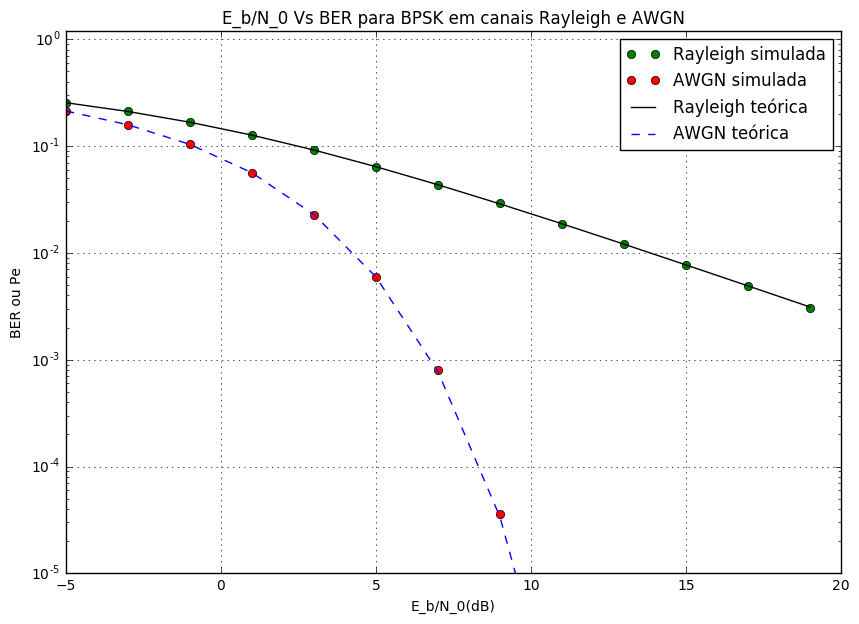

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import erfc
# Parâmetros
N = 10**6                       # Número de símbolos BPSK a serem transmitidos
EbN0dB = np.arange(-5,20,2)     # Valores EbN0 a simular
# Transmissor
d = np.random.rand(N) > 0.5     # Dados binários 
x = 2*d -1                      # Símbolos BPSK: 0 representado por -1 e 1 representado por 1
#
# Inicialização de vetores de BER simulada e teórica
BER_rayleigh_simulada = np.zeros(len(EbN0dB))
BER_awgn_simulada = np.zeros(len(EbN0dB))
#
# Loop de EbNo
for i in range(len(EbN0dB)):
    # Canal
    # Ruído AWGN complexo com média 0 e variância 1 (vetor base)
    noise = 1/np.sqrt(2)*(np.random.randn(N)+1j*np.random.randn(N)) 
    # Vetor de ruído com potência proporcional a EbNo corrente
    n = noise*10**(-EbN0dB[i]/20)  
    # Desvanecimento Rayleigh normalizado
    h = 1/np.sqrt(2)*(np.random.randn(N)+1j*np.random.randn(N))
    #
    # Sinal recebido para caso com somente ruído AWGN
    y_awgn = x + n 
    # Sinal recebido para caso com desvanecimento Rayleigh e ruído AWGN
    y_rayleigh = h*x + n
    #
    # Receptor coerente para o canal Rayleigh (supondo conhecimento de h no receptor)
    y_rayleigh_cap=y_rayleigh/h # Equalizador
    # Os símbolos positivos recebidos são 1, os demais são 0 (lembrar da simbologia)
    r_rayleigh = np.real(y_rayleigh_cap)>0 
    #
    # Receptor para o canal somente AWGN
    r_awgn = np.real(y_awgn) > 0 
    # Contador de erro para o caso com Rayleigh e AWGN
    BER_rayleigh_simulada[i] = np.sum(np.bitwise_xor(d,r_rayleigh))
    # Contador de erro para o caso com somente AWGN
    BER_awgn_simulada[i] = np.sum(np.bitwise_xor(d,r_awgn))
    # Fim do loop de EbN0
# Cálculo da BER para o caso com Rayleigh e AWGN
BER_rayleigh_simulada /= N 
# Cálculo da BER para o caso com somente AWGN
BER_awgn_simulada /= N
#
# Pe Teórica
EbN0=10**(EbN0dB/10)            # Eb/N0 em escala linear
# Implementação direta da equação de Pe para o canal Rayleigh+AWGN
BER_rayleigh_teorica = 0.5*(1-np.sqrt(EbN0/(1+EbN0))) 
# Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = 0.5*erfc(np.sqrt(EbN0))
#
# Gráficos
plt.figure(1,[10,7])
# Rayleigh simulado
plt.semilogy(EbN0dB,BER_rayleigh_simulada,'go',label='Rayleigh simulada')
# AWGN simulado
plt.semilogy(EbN0dB,BER_awgn_simulada,'ro',label='AWGN simulada')
# Rayleigh teórico
plt.semilogy(EbN0dB,BER_rayleigh_teorica,'k-',label='Rayleigh teórica')
# AWGN teórico
plt.semilogy(EbN0dB,BER_awgn_teorica,'b--',label='AWGN teórica')
plt.grid()
plt.axis([-5,20,10**(-5),1.2])
plt.legend()
plt.title("E_b/N_0 Vs BER para BPSK em canais Rayleigh e AWGN")
plt.xlabel('E_b/N_0(dB)')
plt.ylabel('BER ou Pe')
plt.show()

# Prática 4:  Desempenho de modulação digital sujeito a Desvanecimento  Rice

Essa prática se destina a prototipar e analisar o desempenho da modulação digital (BPSK) em canal Rice e sujeito a ruído AWGN. O sinal recebido pode ser representado por:

$$ y = hx + n, $$

sendo  $x$ o sinal transmitido, $n$ o ruído AWGN e $h$ o desvanecimento Rice. 

Sabendo disso, é possível realizar a modelagem do protótipo de simulação de desempenho como mostrado na figura a seguir. Da mesma forma que para canal Rayleigh, vamos assumir recepção coerente.

![fig_simRay](./FIGS/HD_10/simRice.png)

Simulando k = 0.1
Simulando k = 5.0
Simulando k = 30.0


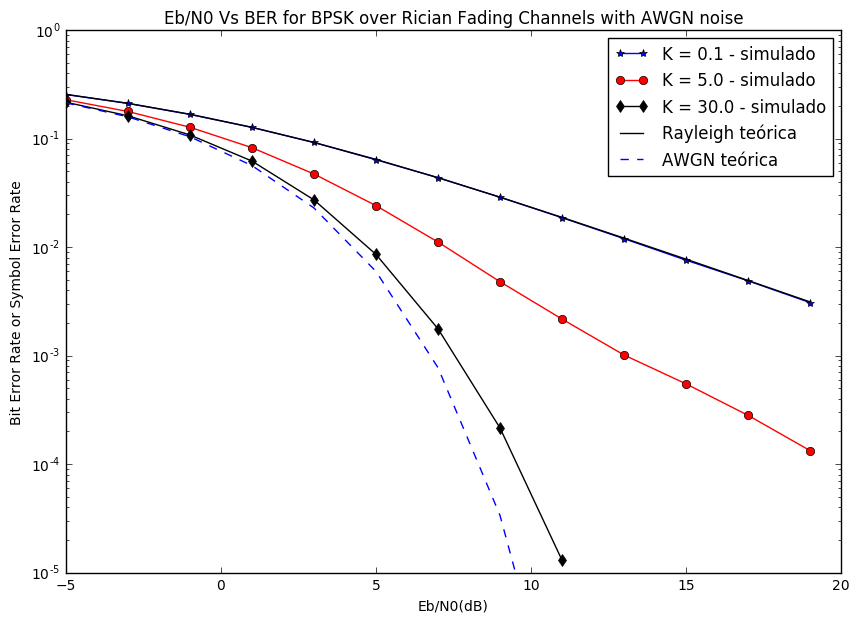

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import erfc
#
# Parâmetros
N = 10**6                          # Número de símbolos BPSK a serem transmitidos
EbN0dB = np.arange(-5,20,2)        # Valores EbN0 a simular
EbN0=10**(EbN0dB/10)               # EbN0 em escala linear
totPower=1                         # Potência total (LOS + NLOS)
K=np.array([0.1,5,30])       # Valores K Ricianos a simular
# Transmissor
d=np.random.rand(N)>0.5            # Dados binários 
x = 2*d -1                         # Símbolos BPSK: 0 representado por -1 e 1 representado por 1
#
# Inicialização de vetores de BER simulada e teórica
simBER_ricean=np.zeros(len(EbN0dB))
# Configuração da figuras e linhas
plt.figure(1,[10,7])
plotStyleSim=['b-*','r-o','k-d','g-^','m->','c-<']
#
# Loop de K Riciano
for index in range(len(K)):
    k = K[index]                   # Valor de K corrente
    # Mensagem de progresso da simulação
    print('Simulando k = {}'.format(str(k)))
    # Canal
    # Parâmetro de não-centralidade e sigma de Rice
    s = np.sqrt( k/(k+1)*totPower ) 
    sigma = totPower/np.sqrt(2*(k+1))
    #
    # Loop de EbNo
    for i in range(len(EbN0dB)):
        # Continuação do Canal
        # 
        # Ruído AWGN complexo com média 0 e variância 1 (vetor base)
        noise = 1/np.sqrt(2)*(np.random.randn(N)+1j*np.random.randn(N))
        # Vetor de ruído com potência proporcional a EbNo corrente    
        n = noise*10**(-EbN0dB[i]/20) 
        # Desvanecimento Rice
        h = ((sigma*np.random.randn(N)+s)+1j*(np.random.randn(N)*sigma+0))
        #
        # Receptor
        # Sinal recebido do canal Rice e AWGN
        y_ricean=h*x+n 
        # Receptor coerente: equalização + decisão
        y_ricean_cap=y_ricean/h 
        r_ricean=np.real(y_ricean_cap)>0
        # Contador de erro
        simBER_ricean[i]=np.sum(np.bitwise_xor(d,r_ricean))
        # Fim do loop de EbN0
    #
    # Cálculo da BER para o valor de K corrente
    simBER_ricean=simBER_ricean/N
    #
    # Gráficos
    plt.semilogy(EbN0dB,simBER_ricean,plotStyleSim[index],label='K = {} - simulado'.format(str(k)) )

# Pes Teóricas
# Implementação direta da equação de Pe para o canal Rayleigh+AWGN
BER_rayleigh_teorica = 0.5*(1-np.sqrt(EbN0/(1+EbN0))) 
# Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = 0.5*erfc(np.sqrt(EbN0))
#
# Graficos
# Rayleigh teórico
plt.semilogy(EbN0dB,BER_rayleigh_teorica,'k-',label='Rayleigh teórica')
# AWGN teórico
plt.semilogy(EbN0dB,BER_awgn_teorica,'b--',label='AWGN teórica')
plt.legend()
plt.title('Eb/N0 Vs BER for BPSK over Rician Fading Channels with AWGN noise')
plt.xlabel('Eb/N0(dB)')
plt.ylabel('Bit Error Rate or Symbol Error Rate')
plt.axis([-5,20,10**(-5),10**0])
plt.show()